In [1]:
#libraries
import pandas as pd
import seaborn as sns
import networkx as nx
import re
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth



          Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.517961    0.315223    0.537652           0.458090    0.323224   
std      0.212195    0.220495    0.146349           0.171783    0.154854   
min      0.002883    0.000146    0.000725           0.000545    0.000759   
25%      0.351171    0.170381    0.454158           0.340041    0.195919   
50%      0.530869    0.222191    0.534175           0.458350    0.304341   
75%      0.694884    0.462493    0.639532           0.561228    0.401921   
max      0.996124    0.998855    0.998277           0.998457    0.998244   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.453066    0.356051              0.437054         0.372184   
std         0.215450    0.210489              0.234468         0.180328   
min         0.0

array([[<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic acid'}>,
        <AxesSubplot:title={'center':'Ash'}>,
        <AxesSubplot:title={'center':'Alcalinity of ash'}>],
       [<AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>,
        <AxesSubplot:title={'center':'Nonflavanoid phenols'}>],
       [<AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>,
        <AxesSubplot:title={'center':'OD280/OD315 of diluted wines'}>],
       [<AxesSubplot:title={'center':'Proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

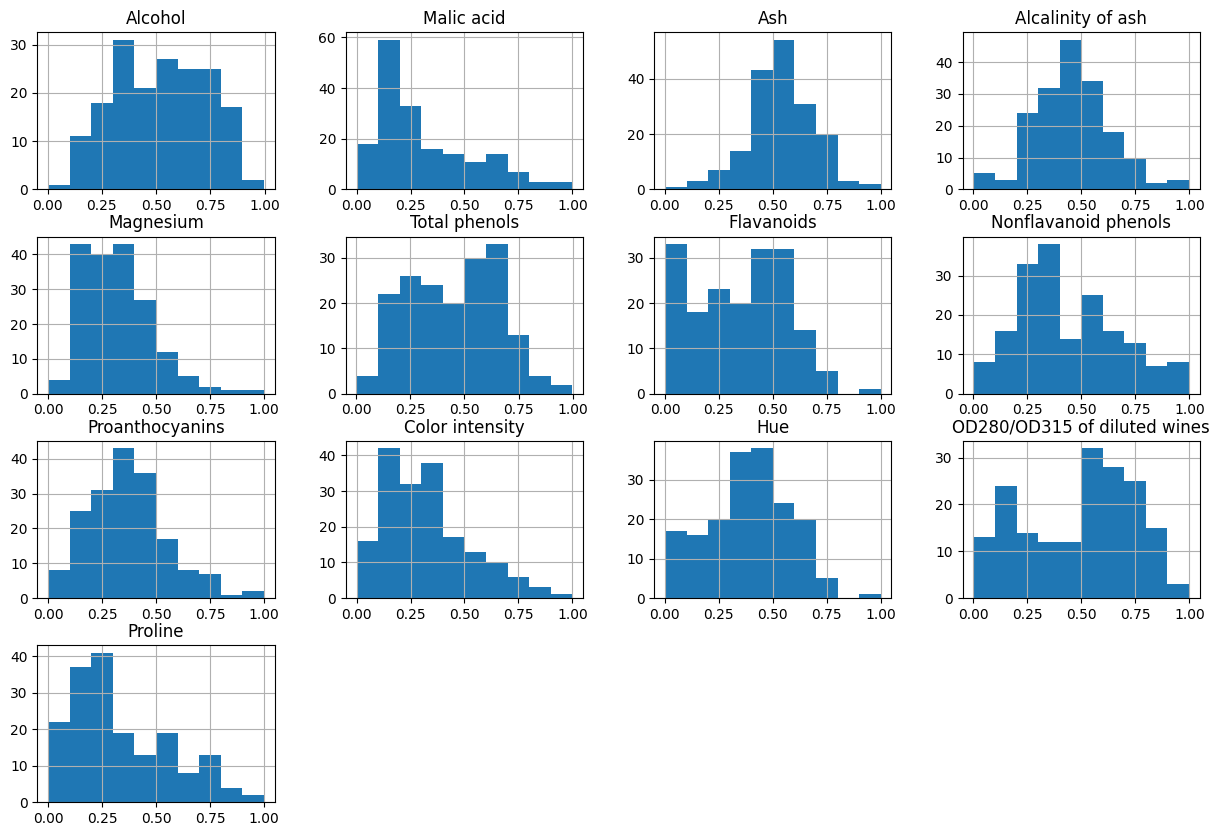

In [5]:
# import data
df = pd.read_csv("wine.csv")
# set class to category
df['class'] = df['class'].astype(str)
df['class'] = df['class'].astype('category')
#select all numeric descriptors
numcols = df.select_dtypes(['number']).columns
#norm to [0,1] all numeric descriptors
for i in numcols:
    df[i] = (df[i]-(0.999*df[i].min()))/((1.001*df[i].max())-(0.999*df[i].min()))

#check ranges before binning
print(df.describe())
df.hist(bins=10, figsize=(15, 10))

In [6]:
#binning: transform numeric variables into categories

bins = [0, 0.25, 0.50, 0.75, 1.0]#range limits

for i in numcols:
    labels = [i+'[0,25]',i+'(25,50]',i+'(50,75]',i+'(75,100]']#bin ids
    print(labels)
    df[i] = pd.cut(df[i], bins=bins, labels=labels)
    
df.info()

['Alcohol[0,25]', 'Alcohol(25,50]', 'Alcohol(50,75]', 'Alcohol(75,100]']
['Malic acid[0,25]', 'Malic acid(25,50]', 'Malic acid(50,75]', 'Malic acid(75,100]']
['Ash[0,25]', 'Ash(25,50]', 'Ash(50,75]', 'Ash(75,100]']
['Alcalinity of ash[0,25]', 'Alcalinity of ash(25,50]', 'Alcalinity of ash(50,75]', 'Alcalinity of ash(75,100]']
['Magnesium[0,25]', 'Magnesium(25,50]', 'Magnesium(50,75]', 'Magnesium(75,100]']
['Total phenols[0,25]', 'Total phenols(25,50]', 'Total phenols(50,75]', 'Total phenols(75,100]']
['Flavanoids[0,25]', 'Flavanoids(25,50]', 'Flavanoids(50,75]', 'Flavanoids(75,100]']
['Nonflavanoid phenols[0,25]', 'Nonflavanoid phenols(25,50]', 'Nonflavanoid phenols(50,75]', 'Nonflavanoid phenols(75,100]']
['Proanthocyanins[0,25]', 'Proanthocyanins(25,50]', 'Proanthocyanins(50,75]', 'Proanthocyanins(75,100]']
['Color intensity[0,25]', 'Color intensity(25,50]', 'Color intensity(50,75]', 'Color intensity(75,100]']
['Hue[0,25]', 'Hue(25,50]', 'Hue(50,75]', 'Hue(75,100]']
['OD280/OD315 of 

In [8]:
# Convertir los datos a un formato adecuado para Apriori
my_df = pd.DataFrame()
for i in df:    
    for j in df[i].unique():
        l = []
        for r in range(len(df)):
            if df[i][r] == j:
                l.append(True)
            else:
                l.append(False)
        my_df[j] = l

print(my_df)

         1      2      3  Alcohol(75,100]  Alcohol(50,75]  Alcohol(25,50]  \
0     True  False  False             True           False           False   
1     True  False  False            False            True           False   
2     True  False  False            False            True           False   
3     True  False  False             True           False           False   
4     True  False  False            False            True           False   
..     ...    ...    ...              ...             ...             ...   
173  False  False   True            False            True           False   
174  False  False   True            False            True           False   
175  False  False   True            False            True           False   
176  False  False   True            False            True           False   
177  False  False   True             True           False           False   

     Alcohol[0,25]  Malic acid[0,25]  Malic acid(25,50]  Malic acid(50,75] 

In [13]:
# Aplicar Apriori
frequent_itemsets = apriori(my_df, min_support=0.3, use_colnames=True)
print("Frequent Itemsets (Apriori):")
print(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
display(rules.head())
print("Rules identified: ", len(rules))
#print(df2)

Frequent Itemsets (Apriori):
     support                                      itemsets
0   0.331461                                           (1)
1   0.398876                                           (2)
2   0.393258                              (Alcohol(50,75])
3   0.365169                              (Alcohol(25,50])
4   0.561798                            (Malic acid[0,25])
5   0.573034                                  (Ash(50,75])
6   0.348315                                  (Ash(25,50])
7   0.544944                    (Alcalinity of ash(25,50])
8   0.337079                    (Alcalinity of ash(50,75])
9   0.528090                            (Magnesium(25,50])
10  0.353933                             (Magnesium[0,25])
11  0.376404                        (Total phenols(50,75])
12  0.370787                           (Flavanoids(25,50])
13  0.337079                            (Flavanoids[0,25])
14  0.365169                 (Nonflavanoid phenols(25,50])
15  0.567416               

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(2),"(Color intensity[0,25])",0.398876,0.410112,0.348315,0.873239,2.129269,0.184730,4.653558,0.882273
1,"(Color intensity[0,25])",(2),0.410112,0.398876,0.348315,0.849315,2.129269,0.184730,3.989275,0.899078
2,"(Proline[0,25])",(2),0.438202,0.398876,0.303371,0.692308,1.735645,0.128582,1.953652,0.754444
3,(2),"(Proline[0,25])",0.398876,0.438202,0.303371,0.760563,1.735645,0.128582,2.346332,0.705088


Rules identified:  4


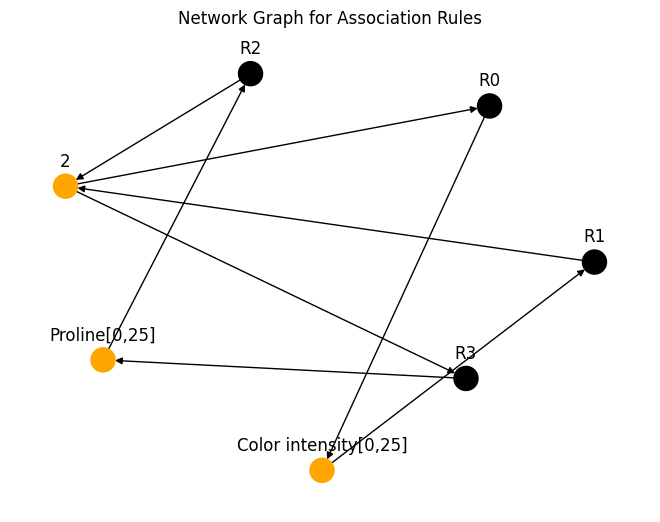

In [14]:
def draw_network(rules, rules_to_show):
  # Directional Graph from NetworkX
  network = nx.DiGraph()
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, len(rules))

In [15]:
# Aplicar FP-gowth
frequent_itemsets = fpgrowth(my_df, min_support=0.3, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
display(rules.head())
print("Rules identified: ", len(rules))

#draw_network(rules, len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(2),"(Color intensity[0,25])",0.398876,0.410112,0.348315,0.873239,2.129269,0.184730,4.653558,0.882273
1,"(Color intensity[0,25])",(2),0.410112,0.398876,0.348315,0.849315,2.129269,0.184730,3.989275,0.899078
2,"(Proline[0,25])",(2),0.438202,0.398876,0.303371,0.692308,1.735645,0.128582,1.953652,0.754444
3,(2),"(Proline[0,25])",0.398876,0.438202,0.303371,0.760563,1.735645,0.128582,2.346332,0.705088


Rules identified:  4


In [ ]:
# Aplicar ECLAT
#https://hands-on.cloud/implementation-of-eclat-algorithm-using-python/